# Домашнее задание 5. Градиентный спуск. (10 баллов + 2 балла бонус)

В этом домашнем задании вы реализуете градиентный спуск для линейной регрессии, а также изучите, как он ведёт себя при разных параметрах и с разными функциями потерь.

Правила:

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания всем участникам нарушения будет выставлено 0 баллов, независимо от того, кто у кого списывал.

* Старайтесь сделать код максимально оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, рассмотренных в курсе.  

In [71]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — **Mean Squared Error (MSE)**:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов.

Чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его **не нужно**. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса.
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять градиент функции потерь по параметрам модели.

In [72]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число - значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`.

Он должен вычислять лосс и градиент по формулам наверху.

In [73]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        # -- YOUR CODE HERE -- ( ⚆ ω ⚆)
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        
        return np.mean((np.dot(X, w)-y) ** 2)

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE -- =^･ω･^=
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        
        return 2*np.dot(X.T, np.dot(X, w) - y)/ len(y)

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [74]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^{t+1} = w^{t} - \eta \nabla_{w} Q(w^{t}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`.

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`,
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше, и возвращать
траекторию спуска (список из новых значений весов на каждом шаге).

In [75]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) - начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) - матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) - вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int --сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) - история весов на каждом шаге
    """
    # -- YOUR CODE HERE -- (ﾉ´ з `)ノ
    
    w = w_init.copy()
    w_list = [w.copy()]
    for i in range(n_iterations): 
        grad = loss.calc_grad(X, y, w)
        w -= lr*grad
        w_list.append(w.copy())
    return np.array(w_list)
        

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории.

In [143]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :] # разные масштабы признаков
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))
w_init_5 = w_init.copy() # для задания 1.5
w_init_7 = w_init.copy() # для задания 1.7
w_init_81 = w_init.copy() # для задания 1.8
w_init_82 = w_init.copy() 
w_init_22 = w_init.copy()

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [77]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [78]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # Отображение уровня функции потерь
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # Отображение траектории спуска
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте четыре и более различных значений для `lr`.

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска.

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`.
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1.

lr= 0.0001


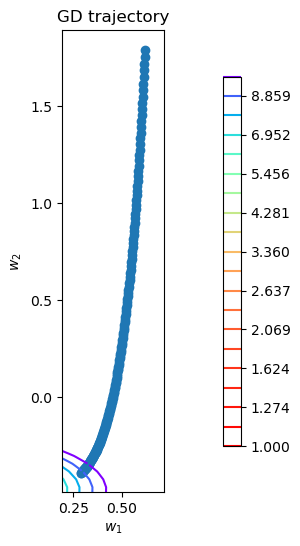

lr= 0.00055


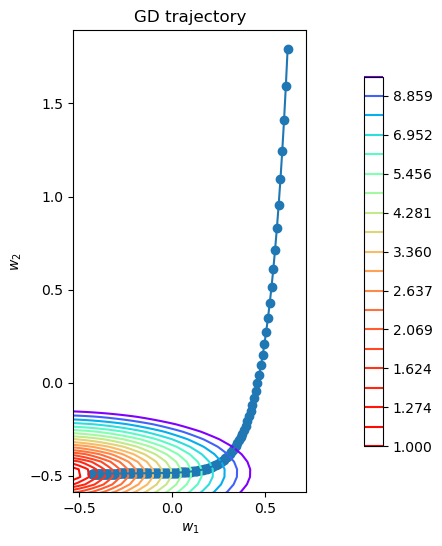

lr= 0.001


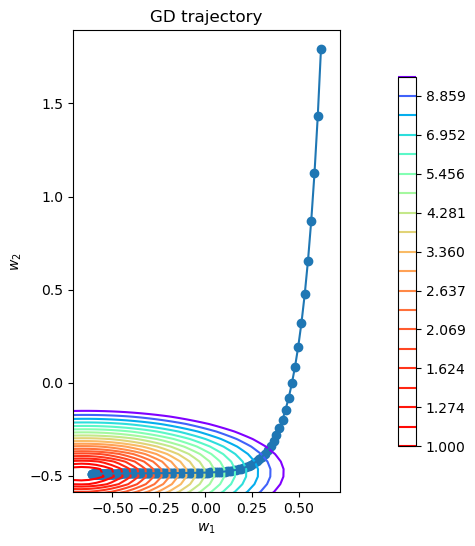

lr= 0.0055


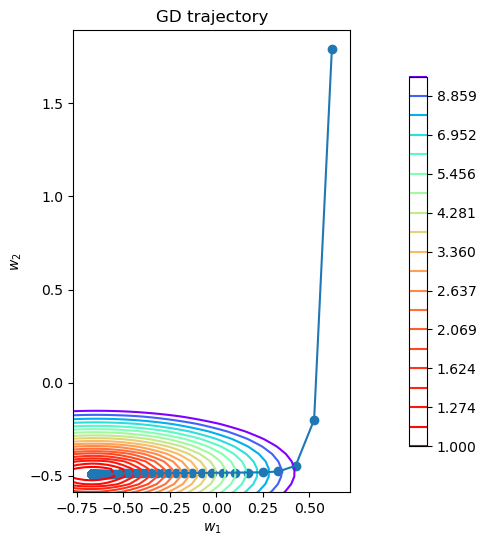

lr= 0.01


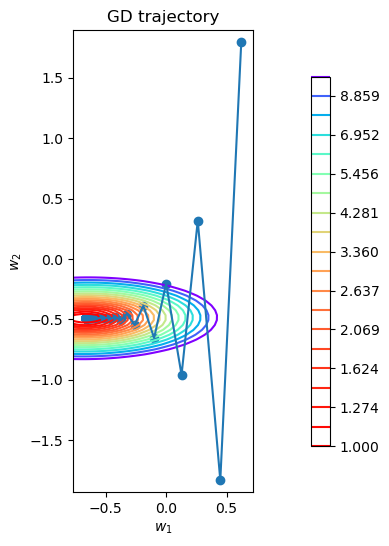

lr= 0.1


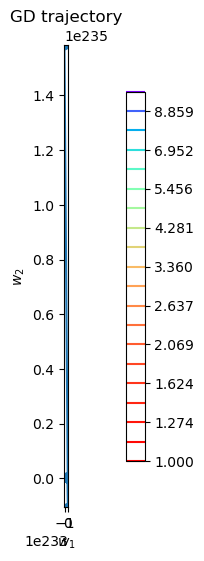

In [79]:
# -- YOUR CODE HERE -- ٩(⁎❛ᴗ❛⁎)۶
lengths = [0.0001, 0.00055, 0.001, 0.0055, 0.01, 0.1]
for i in lengths: 
    print('lr=', i)
    w_list = gradient_descent(w_init, X, y, loss, i, n_iterations=200)
    plot_gd(w_list, X, y, loss)

Выводы: 
1) Слишком маленькая длина шага приводит к тому, что градиентный спуск сходится очень медленно так, что минимум может быть не достигнут за данное число итераций (что и произошло в примерах с lr, равными 0.0001 и 0.00055). С другой стороны снижается риск перескочить минимум
2) Слишком большая длина шага приводит к резким колебаниям градиентного спуска вокруг оптимума и риску взрыва градиента (как это произошло в примере с lr=0.1) 
3) Для данного примера оптимальными стали lr, равные 0.001, 0.0055 и 0.01, поскоьку градиентный спуск в них пришел к минимуму. 

Теперь реализуем стохастический градиентный спуск.

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`.

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча.

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [80]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE -- (＠_＠)
    
    w = w_init.copy()
    w_list = [w.copy()]
    
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        grad = loss.calc_grad(X_batch, y_batch, w)
        w -= lr*grad
        w_list.append(w.copy())
    return np.array(w_list)

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`.

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного? Что происходит при малых и больших `batch_size`?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

lr= 0.0001 , batch_size= 10


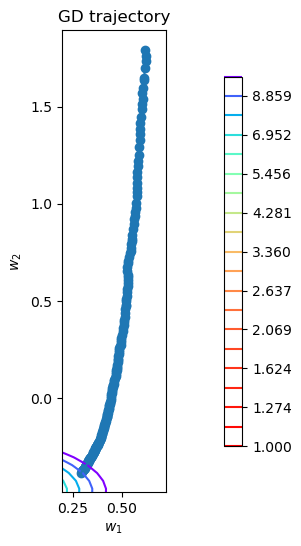

lr= 0.0001 , batch_size= 50


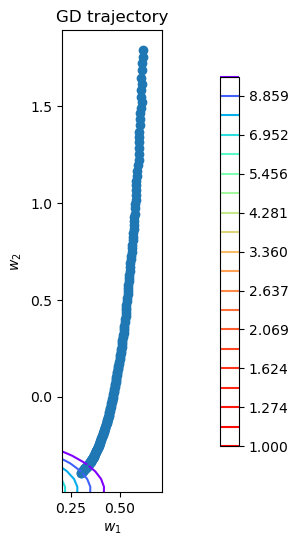

lr= 0.0001 , batch_size= 100


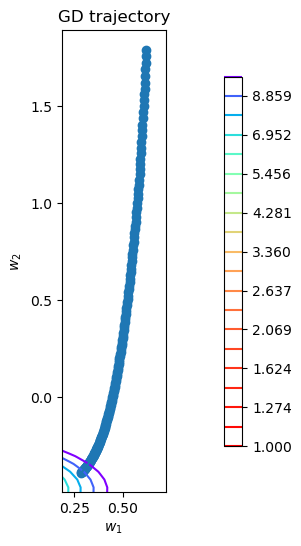

lr= 0.0001 , batch_size= 200


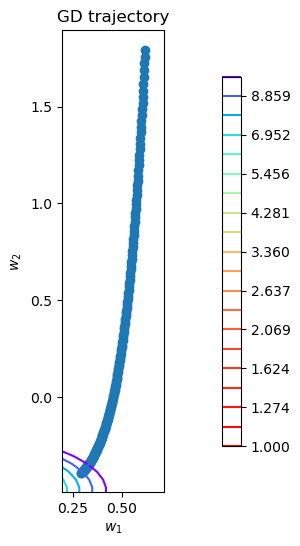

lr= 0.0001 , batch_size= 300


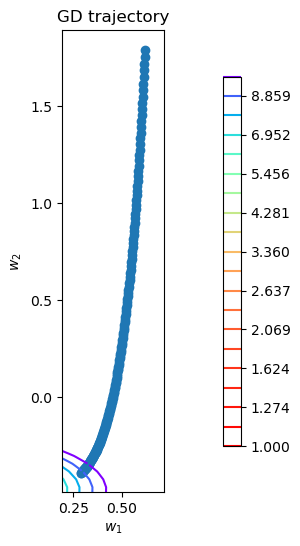

lr= 0.00055 , batch_size= 10


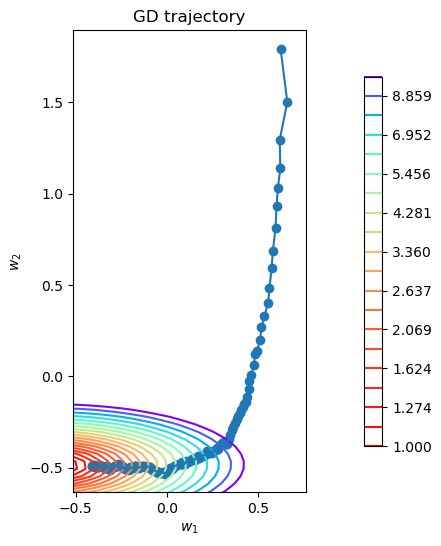

lr= 0.00055 , batch_size= 50


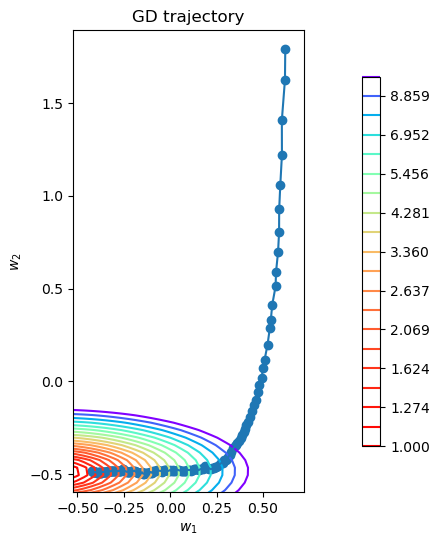

lr= 0.00055 , batch_size= 100


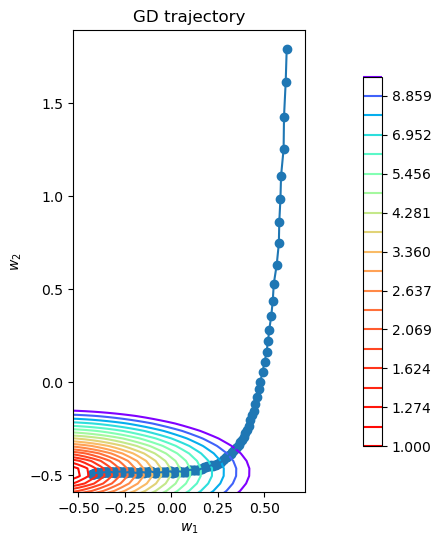

lr= 0.00055 , batch_size= 200


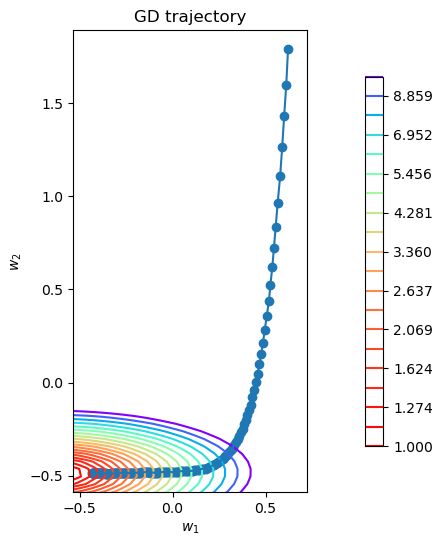

lr= 0.00055 , batch_size= 300


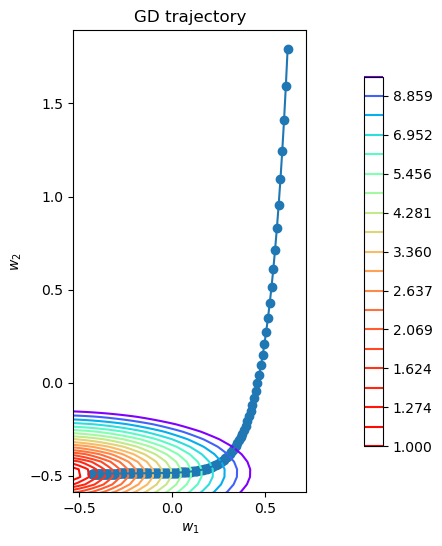

lr= 0.001 , batch_size= 10


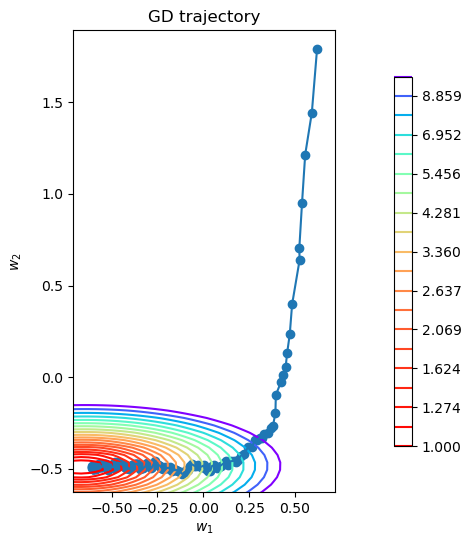

lr= 0.001 , batch_size= 50


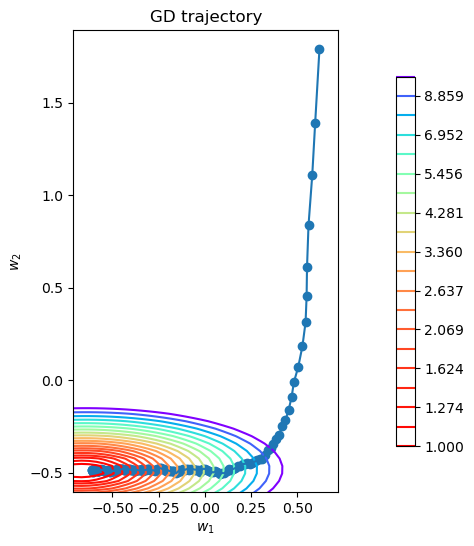

lr= 0.001 , batch_size= 100


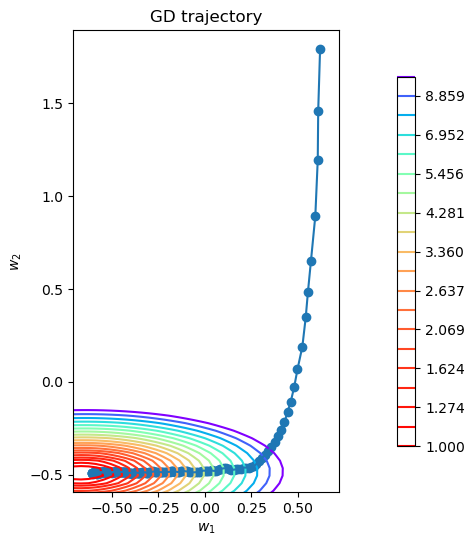

lr= 0.001 , batch_size= 200


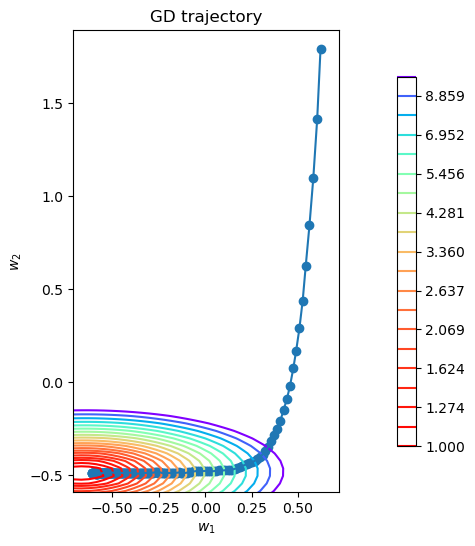

lr= 0.001 , batch_size= 300


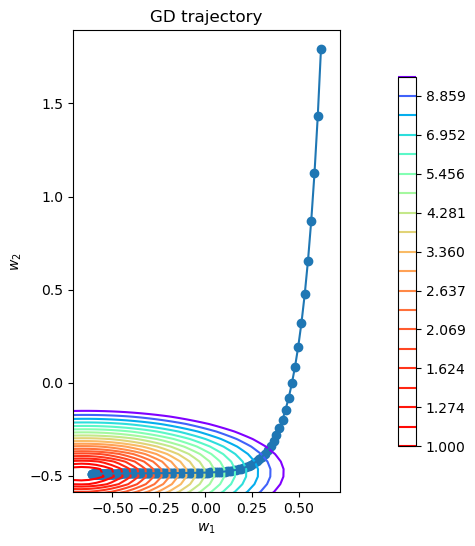

lr= 0.0055 , batch_size= 10


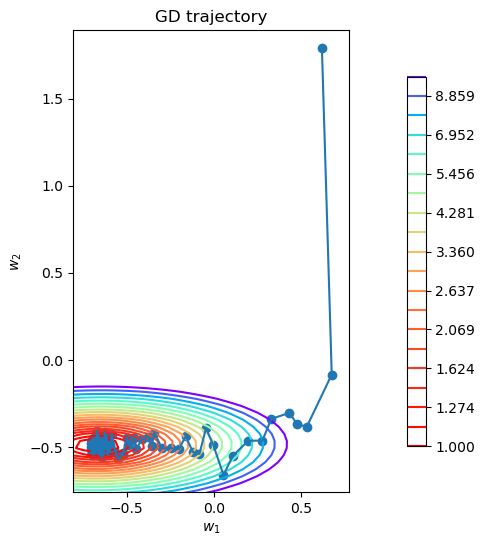

lr= 0.0055 , batch_size= 50


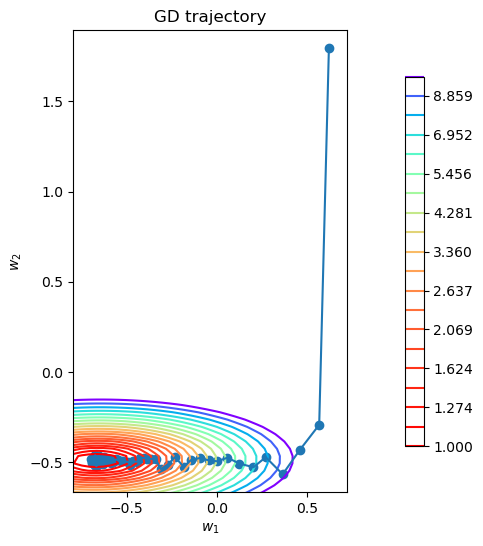

lr= 0.0055 , batch_size= 100


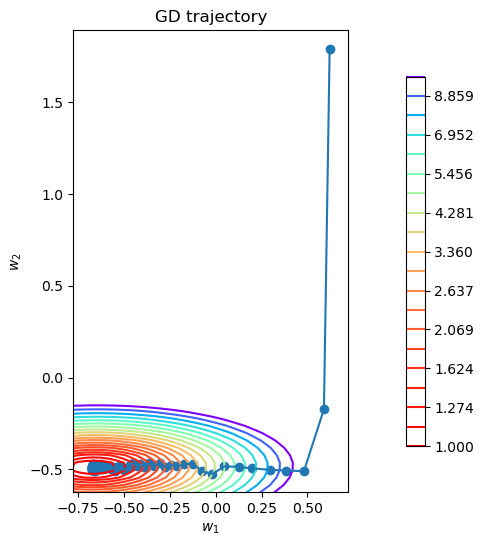

lr= 0.0055 , batch_size= 200


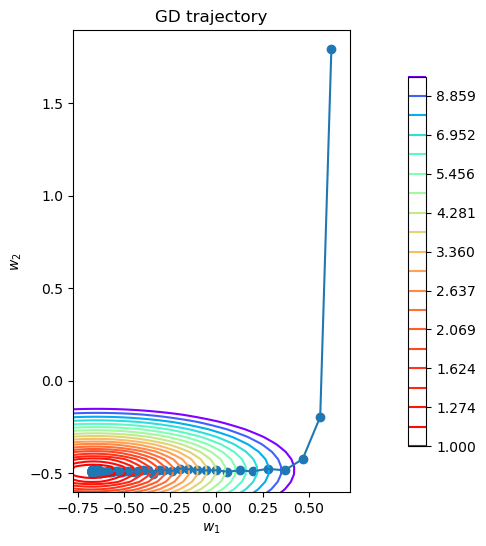

lr= 0.0055 , batch_size= 300


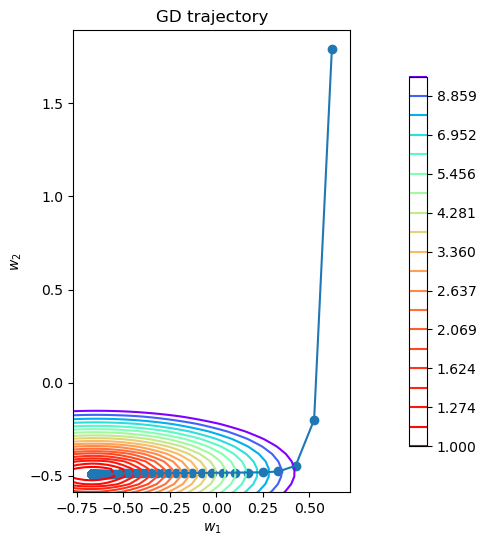

lr= 0.01 , batch_size= 10


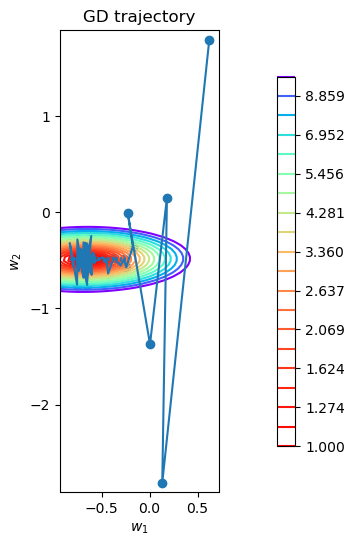

lr= 0.01 , batch_size= 50


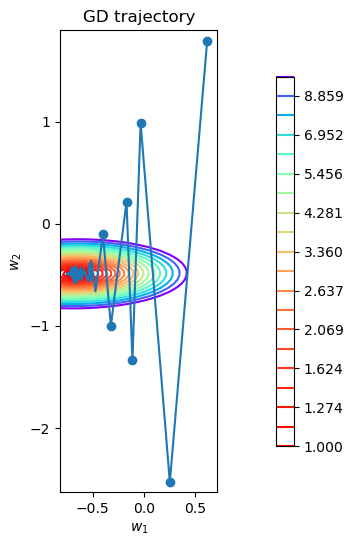

lr= 0.01 , batch_size= 100


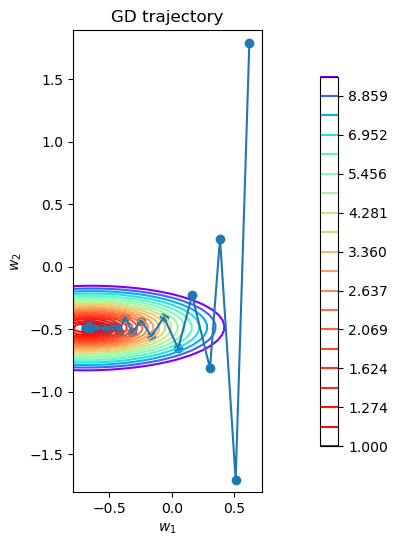

lr= 0.01 , batch_size= 200


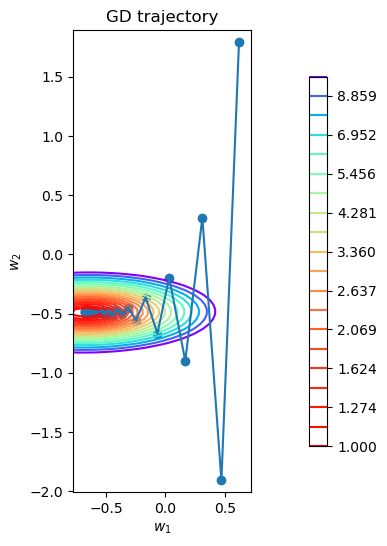

lr= 0.01 , batch_size= 300


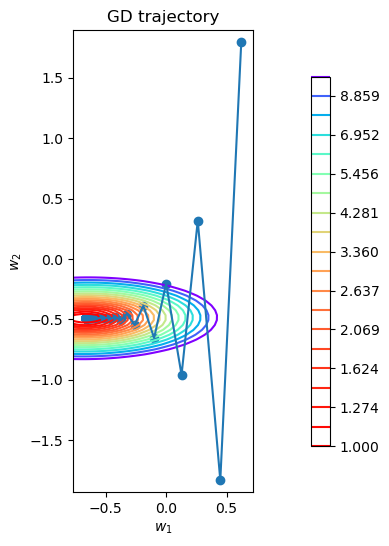

lr= 0.1 , batch_size= 10


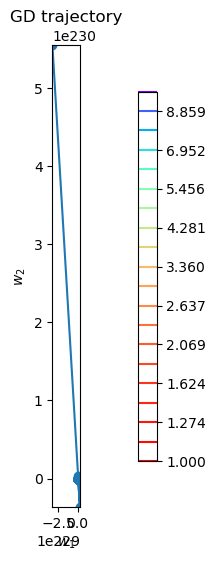

lr= 0.1 , batch_size= 50


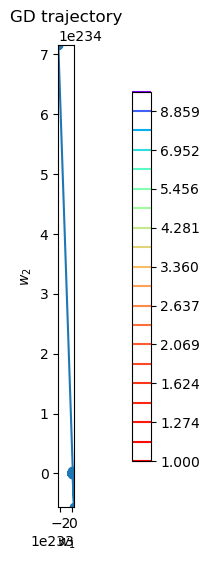

lr= 0.1 , batch_size= 100


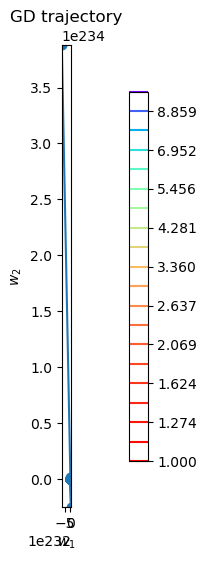

lr= 0.1 , batch_size= 200


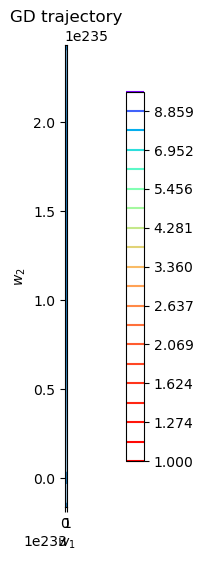

lr= 0.1 , batch_size= 300


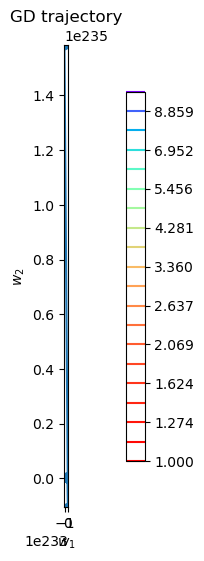

In [81]:
# -- YOUR CODE HERE -- ٩(⁎❛ᴗ❛⁎)۶

lengths = [0.0001, 0.00055, 0.001, 0.0055, 0.01, 0.1]
batches = [10, 50, 100, 200, 300]
for lr in lengths:
    for b in batches: 
        print('lr=', lr, ', batch_size=', b)
        w_list = stochastic_gradient_descent(w_init_5, X, y, loss, lr, b, n_iterations=200)
        plot_gd(w_list, X, y, loss)
        

Выводы: 
1) Опять же при слишком маленьких lr (например, 0.0001) происходит очень медленное приближение к минимуму, что создает угрозу несходимости к нему. Однако, при таких значениях lr, неважно какой брать batch size: из-за маленьких шагов график все равно остается гладким
2) При слишком больших lr спуск становится нестабильным и траектория скачет. Не стоит брать маленькие bath size, поскольку спуск станет еще более хаотичным. Более того существует угроза взрыва градиента (что и произошло при lr=0.1) 
3) При малый batch size (например, 10). Слишком резкие скачки, но один шаг требует меньшее вычислений и работает быстрее
4) При больших batch size градиентный спуск ведет себя почти как обычный: гладкие траектории. Но каждый раз дольше считать
5) Итого, сравним два спуска. Стохастический спуск работает быстрее, чем обычный, так как на каждом шаге обрабатывает меньше данных. Однако он более резкий и случайный.

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага.

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы точнее этого минимума достигнуть и не "перепрыгнуть" его.

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [82]:
def stochastic_gradient_descent_p(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) - начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) - матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) - вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float - параметр величины шага, на который нужно домножать градиент
    :param batch_size: int - размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float - значение степени в формуле затухания длины шага
    :param n_iterations: int - сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) - история весов на каждом шаге
    """
    # -- YOUR CODE HERE -- ¯\_(ツ)_/¯
    
    w = w_init.copy()
    w_list = [w.copy()]
    
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        grad = loss.calc_grad(X_batch, y_batch, w)
        step = lr*((1/(1+i))**p)
        w -= step*grad
        w_list.append(w.copy())
    return np.array(w_list)

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска. Что происходит при маленьком или большом значении p?

p= 0.1


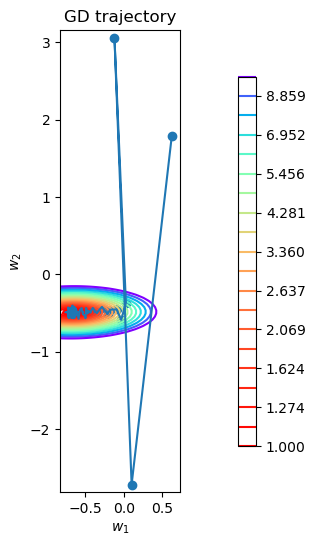

p= 0.3


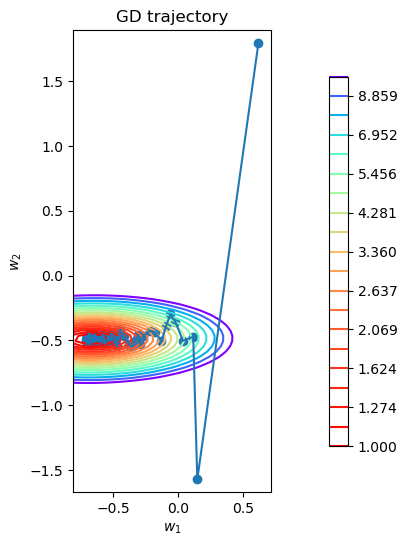

p= 0.5


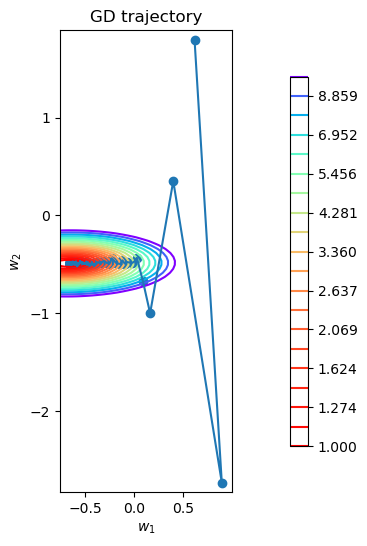

p= 0.7


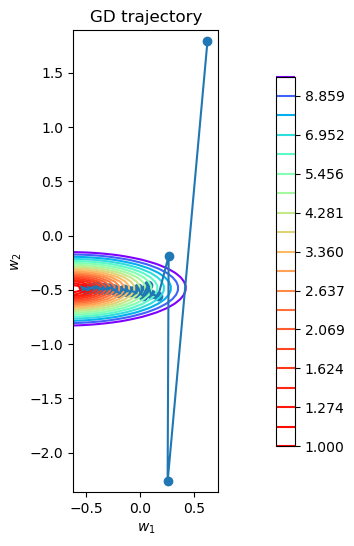

p= 1


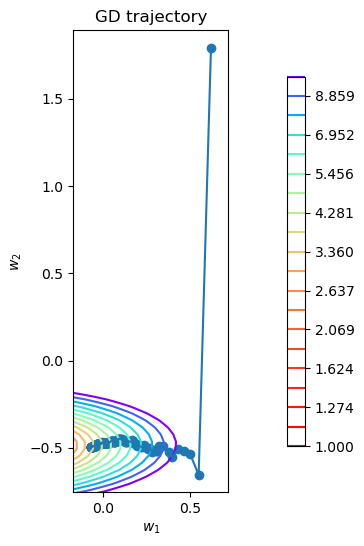

In [83]:
# -- YOUR CODE HERE -- [✖‿✖]

p_par = [0.1, 0.3, 0.5, 0.7, 1]

for p in p_par:
    w_list = stochastic_gradient_descent_p(w_init_7, X, y, loss, 0.01, 10, p, n_iterations=200)
    print('p=', p)
    plot_gd(w_list, X, y, loss)

**Параметр p отвечает за скорость уменьшения шага. При маленьких p шаг почти как постоянный и убывает медленно, поэтому может прыгать. При больших p затухание слишком быстро, шаг почти сразу становится маленьким, может остановиться раньше времени.** 

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

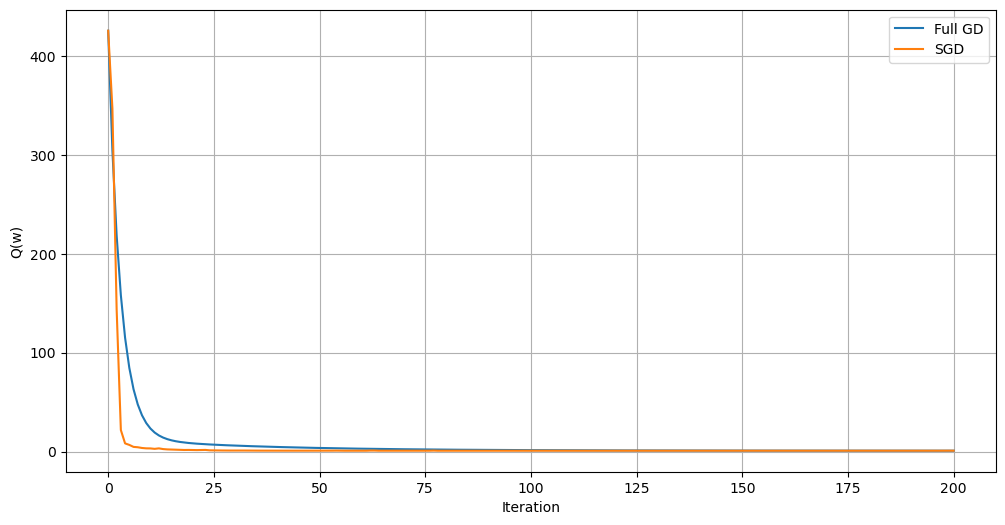

In [84]:
# -- YOUR CODE HERE -- ┌(ಠ_ಠ)┘

w_list_gd = gradient_descent(w_init_81, X, y, loss, 0.001, n_iterations=200)
w_list_sgd = stochastic_gradient_descent_p(w_init_82, X, y, loss, 0.01, 10, 0.3, n_iterations=200)

mse_gd = []
mse_sgd = []

for w in w_list_gd:
    mse_gd.append(loss.calc_loss(X, y, w))
for w in w_list_sgd:
    mse_sgd.append(loss.calc_loss(X, y, w))
    
plt.figure(figsize = (12, 6))
plt.plot(mse_gd, label='Full GD')
plt.plot(mse_sgd, label = 'SGD')
plt.xlabel('Iteration')
plt.ylabel('Q(w)')
plt.legend()
plt.grid(True)
plt.show()

**На старте SGD резко снижает лосс, быстрее, чем обычный градиентный спуск. Таким образом у SGD быстрая сходимость в начале, что является его преимуществом. Однако, у GD более плавное движение.**

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`.

В методе `predict` мы будем применять нашу регрессию к датасету.

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`.

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [85]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        # -- YOUR CODE HERE -- ʕ•ᴥ•ʔ
       
        n_features = X.shape[1]
        w_init = np.random.uniform(-2, 2, (n_features))
        
        w_list = gradient_descent(w_init, X, y, loss=self.loss, lr=self.lr, n_iterations=100)
        self.w = w_list[-1]

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        # -- YOUR CODE HERE -- ٩(⁎❛ᴗ❛⁎)۶
        #return X.dot(self.w)
        return X.dot(self.w)

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации.

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [86]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [87]:
import pandas as pd

X_raw = pd.read_csv(
    "cars_data.csv",
    header=None,
    na_values=["?"],
    skiprows=1,
    index_col=0
)
X_raw = X_raw[~X_raw[26].isna()].reset_index(drop=True)
X_raw.head()

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [88]:
y = X_raw[26]
X_raw = X_raw.drop(26, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [89]:
# Посмотрим, где есть пропуски: 
X_raw.isna().sum(), y.isna().sum()

(1      0
 2     37
 3      0
 4      0
 5      0
 6      2
 7      0
 8      0
 9      0
 10     0
 11     0
 12     0
 13     0
 14     0
 15     0
 16     0
 17     0
 18     0
 19     4
 20     4
 21     0
 22     2
 23     2
 24     0
 25     0
 dtype: int64,
 0)

In [90]:
# Заполним пропуски: вещественные - на медиану, категориальные на моду
cols = [2, 19, 20, 22, 23]
X_raw[cols] = X_raw[cols].fillna(X_raw[cols].median())
X_raw[6] = X_raw[6].fillna(X_raw[6].mode().iloc[0])

X_raw.isna().sum().sum(), y.isna().sum()

(0, 0)

**Закодируем категориальные переменные:** 
* 6 и 16: просто присвоим числа, написанные строкой
* 3-5, 7-9, 15, 18 - через OneHotEncoding, так как нет упорядоченности 

In [91]:
X_raw[6].value_counts(), X_raw[16].value_counts()

(6
 four    115
 two      86
 Name: count, dtype: int64,
 16
 four      157
 six        24
 five       10
 two         4
 eight       4
 three       1
 twelve      1
 Name: count, dtype: int64)

In [92]:
# Кодирование категориальных переменных

X_raw[6] = X_raw[6].replace({'two': 2, 'four': 4})
X_raw[16] = X_raw[16].replace({'four': 4, 'six': 6, 'five': 5, 'two': 2,'eight': 8, 'three': 3, 'twelve': 12})

X_raw = pd.get_dummies(X_raw, columns= [3, 4, 5, 7, 8, 9, 15, 18], drop_first=True)

In [93]:
# Разделим датасет на обучающую и тестовую выборку
from sklearn.model_selection import train_test_split
np.random.seed(13)
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.3, random_state=13) 

In [94]:
X_train.isna().sum().sum()

0

In [95]:
# Нормализируем числовые данные: 
numeric_columns = [1, 2, 6, 10, 11, 12, 13, 14, 16, 17, 19, 20, 21, 22, 23, 24, 25]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[numeric_columns] = pd.DataFrame(
    scaler.fit_transform(X_train[numeric_columns]),
    columns=numeric_columns,
    index=X_train.index)

X_test[numeric_columns] = pd.DataFrame(
    scaler.transform(X_test[numeric_columns]),
    columns=numeric_columns,
    index=X_test.index)

In [96]:
from sklearn.preprocessing import StandardScaler

numeric_columns = [1, 2, 10, 11, 12, 13, 14, 17, 19, 20, 21, 22, 23, 24, 25]

scaler = StandardScaler()
X_train[numeric_columns] = pd.DataFrame(
    scaler.fit_transform(X_train[numeric_columns]),
    columns=numeric_columns,
    index=X_train.index)
X_test[numeric_columns] = pd.DataFrame(
    scaler.transform(X_test[numeric_columns]),
    columns=numeric_columns,
    index=X_test.index)

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [97]:
# -- YOUR CODE HERE -- (ﾉ´ з `)ノ

X_train_np = np.array(X_train, dtype=np.float64)
y_train_np = np.array(y_train, dtype=np.float64)
lr = LinearRegression(MSELoss(), lr=0.01).fit(X_train_np, y_train_np)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [98]:
from sklearn.metrics import mean_squared_error

# -- YOUR CODE HERE -- ( ⚆ ω ⚆)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test) 

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"MSE на обучающей выборке: {round(train_mse, 3)}")
print(f"MSE на тестовой выборке: {round(test_mse, 3)}")

MSE на обучающей выборке: 8330204.903
MSE на тестовой выборке: 19121492.659


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации.

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`.

Он должен вычислять лосс и градиент по формулам выше.

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`.

In [99]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE -- (´｡• ᵕ •｡`)
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        mse_loss = np.mean((np.dot(X, w)-y) ** 2)
        l2_reg = self.coef * np.sum(w[:-1]**2)
        return mse_loss + l2_reg

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE -- (￢_￢)
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        mse_grad = 2*np.dot(X.T, np.dot(X, w) - y)/ len(y)
        l2_grad = 2 * self.coef * w
        l2_grad[-1] = 0
        return mse_grad + l2_grad

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [100]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации.

In [101]:
lambdas = [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 10]
results = []

from sklearn.metrics import mean_squared_error
for l in lambdas: 
    lr2 = LinearRegression(MSEL2Loss(l), lr=0.01).fit(X_train_np, y_train_np)
    y_train_pred_l2 = lr2.predict(X_train)
    y_test_pred_l2 = lr2.predict(X_test)
    mse_train_l2 = mean_squared_error(y_train, y_train_pred_l2)
    mse_test_l2 = mean_squared_error(y_test, y_test_pred_l2)
    results.append([l, round(mse_train_l2, 3), round(mse_test_l2, 3)])

res = pd.DataFrame(results, columns=["Lambda", "Train MSE", "Test MSE"])
results

[[0.0001, 8327603.329, 19112944.151],
 [0.001, 8327415.883, 19121594.171],
 [0.01, 8344026.618, 19197320.238],
 [0.1, 8559358.434, 20000685.675],
 [0.5, 10168778.04, 23730565.309],
 [1.0, 12447075.921, 27923422.171],
 [10, 29224825.331, 54950262.262]]

Итак лучшим из взятых $\lambda$ оказалась **0.0001**, ошибка уменьшилась на тестовой и обучающей выборке

In [103]:
data = {
    "Модель": ["Без регуляризации", "С регуляризацией (λ=0.0001)"],
    "MSE (Train)": [8330204.903, 8327603.329],
    "MSE (Test)": [19121492.659, 19112944.151]}
pd.DataFrame(data)

,Модель,MSE (Train),MSE (Test)
0,Без регуляризации,8330204.903,1.912149e+07
1,С регуляризацией (λ=0.0001),8327603.329,1.911294e+07


В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`.

Он должен вычислять лосс и градиент по формулам выше.

In [160]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE -- (っ˘ڡ˘ς)
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        z = X.dot(w) - y
        first = 0.5 * (z**2)
        second = self.eps*(abs(z) - self.eps/2)
        return np.mean(np.where(np.abs(z) < self.eps, first, second))

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE -- ٩(ˊ〇ˋ*)و
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        z = X.dot(w) - y 
        dz = np.where(np.abs(z)<= self.eps, z, self.eps * np.sign(z))
        return X.T.dot(dz) / len(y)

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [161]:
# -- YOUR CODE HERE -- # (⌐■_■)

hl = LinearRegression(HuberLoss(1), lr=0.01).fit(X_train_np, y_train_np)
from sklearn.metrics import mean_squared_error

# -- YOUR CODE HERE -- ( ⚆ ω ⚆)

y_train_pred = hl.predict(X_train)
y_test_pred = hl.predict(X_test) 

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mse, test_mse

(213988077.1659202, 290177509.53727233)

**Значения MSE на HuberLoss получились больше, что в целом нормально, так как в HuberLoss мы минимизируем не MSE, а гибридную функцию, в отличие от MSELoss. Следовательно, не стоит сравнивать только  через MSE. Например, можно простроить график предсказанных значений двух модолей и сравнить с правильными ответами**

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2025 в ячейку ниже:

In [162]:
# -- YOUR MEME HERE -- ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
from IPython.display import Image
print('                                Tralalero Tralala')
Image(url='https://cdn.thingiverse.com/assets/2c/18/d4/b8/d4/featured_preview_ab67616d00001e026267a426d1ca9c22b813835a1.jpg')

                                Tralalero Tralala


### БОНУС (2 балла)

Градиентный спуск — далеко не единственный метод оптимизации.
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2 балла)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии.

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределения с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [141]:
def simulated_annealing(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    T_init: float = 10.0,
    n_iterations: int = 1000,
    step_size: float = 0.05,
) -> List[np.ndarray]:
    """
    Функция имитации отжига
    :param w_init: np.ndarray размера (n_features,) - начальное значение весов
    :param X: np.ndarray размера (n_objects, n_features) - матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) - вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, с методом calc_loss(X, y, w)
    :param T_init: float - начальная температура
    :param n_iterations: int - количество итераций
    :param step_size: float - размер шага
    """
    
    w = w_init.copy()
    best = w.copy()
    best_loss = loss.calc_loss(X, y, best)
    w, curr_loss = best.copy(), best_loss

    results = [w.copy()]

    for i in range(n_iterations):
        new_w = w + np.random.standard_t(df=3, size=w.shape) * step_size
        new_loss = loss.calc_loss(X, y, new_w)

        if new_loss < best_loss:
            best, best_loss = new_w.copy(), new_loss

        delta = new_loss - curr_loss
        T = T_init / (i + 1)
        prob = np.exp(-delta / T) if T > 1e-8 else 0.0

        if delta < 0 or np.random.rand() < prob:
            w, curr_loss = new_w.copy(), new_loss

        results.append(w.copy())

    return results

In [156]:
# Немного изменим функцию для алгоритма иммитации отжига
def plot_gd_sa(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("Simulated Annealing Trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # Отображение уровня функции потерь
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # Отображение траектории спуска
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

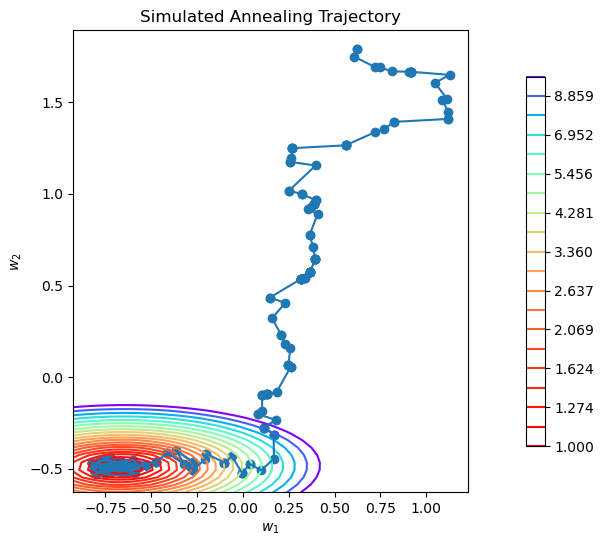

In [157]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :] # разные масштабы признаков
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))
w_init_22 = w_init.copy()

loss = MSELoss()
w_list = simulated_annealing(w_init_22, X, y, loss)
plot_gd(w_list, X, y, loss)

Можем увидеть, что траектория сильно хаотичная и колеблится, в отличие от градиентного спуска

In [163]:
from sklearn.metrics import mean_squared_error

w_init = np.random.randn(X_train_np.shape[1])
loss = HuberLoss(1) 

w_list = simulated_annealing(w_init, X_train_np, y_train_np, loss)
w_res = w_list[-1]

y_train_pred = X_train.dot(w_res)
y_test_pred = X_test.dot(w_res)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("MSE на обучающей выборке:", mse_train)
print("MSE на тестовой выборке:", mse_test)

MSE на обучающей выборке: 212923691.1824223
MSE на тестовой выборке: 289022911.1399941


MSE на тестовой и обучающей выборке вышло больше, чем при градиентном спуске